In [1]:
import torch
from transformers import Speech2TextProcessor, Speech2TextForConditionalGeneration, AutoModelForSpeechSeq2Seq, AutoProcessor, pipeline
from scipy.io.wavfile import read
import json
from IPython.display import Markdown, display
from pandas import read_csv

from prepare_in_the_wild import run_asr_pipeline, join_meta_transcriptions
from inputs import transcriptions_path

/home/infres/nnymand-23/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 1. Speech &rarr; Text

- Audio Data

In [2]:
display(Markdown(f"**Dat6a exists in**  :  {transcriptions_path}"))
transcriptions = run_asr_pipeline()

**Data exists in**  :  data/transcriptions/test_in_the_wild_transcriptions.json

/home/infres/nnymand-23/.venv/lib/python3.12/site-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(
You have passed language=english, but also have set `forced_decoder_ids` to [[1, None], [2, 50360]] which creates a conflict. `forced_decoder_ids` will be ignored in favor of language=english.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


In [2]:
with open(transcriptions_path) as file:
    transcriptions = json.load(file)

- Meta Data

In [3]:
in_the_wild = join_meta_transcriptions(transcriptions)

- Plot

In [2]:
import json
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Load the JSON file (replace 'data.json' with your actual file path)
with open('data/in_the_wild.json', 'r') as f:
    data = json.load(f)

# Convert to DataFrame for easier processing
df = pd.DataFrame(data)

Vectorized
t-SNE applied


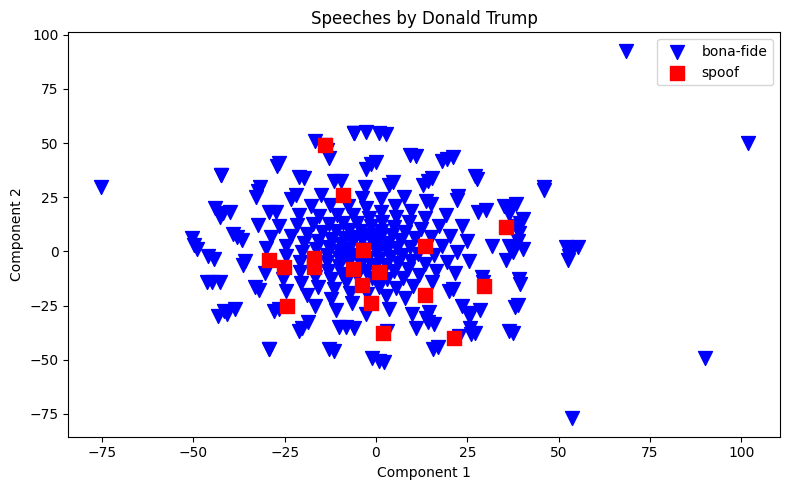

In [24]:
trump_df = df[df['speaker'].isin(['Donald Trump'])]
plot_speeches(trump_df)

In [30]:
vectorizer = TfidfVectorizer(max_features=300)
X = vectorizer.fit_transform(df['content']).toarray()
print("Vectorized")

# Reduce to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=0, perplexity=10)
X_tsne = tsne.fit_transform(X)

Vectorized


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE

def plot_speeches(X_tsne, df):

    marker_shapes = df['label'].map({'bona-fide': 'v', 'spoof': 's'}) 
    unique_speakers = df['speaker'].unique()

    num_speakers = 15#len(unique_speakers)
    num_cols = 5
    num_rows = int(np.ceil(num_speakers / num_cols))

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5), constrained_layout=True)

    axes = axes.flatten()

    for idx, speaker in enumerate(unique_speakers[:15]):
        ax = axes[idx]
        indices = df['speaker'] == speaker
        
        is_bona_fide = df[indices]['label'] == 'bona-fide'
        is_spoof = df[indices]['label'] == 'spoof'
        
        # bona-fide
        ax.scatter(
            X_tsne[indices][is_bona_fide, 0],
            X_tsne[indices][is_bona_fide, 1],
            marker='v',
            color='blue',
            label='bona-fide',
            s=100
        )
        
        # spoof
        ax.scatter(
            X_tsne[indices][is_spoof, 0],
            X_tsne[indices][is_spoof, 1],
            marker='s', 
            color='red',
            label='spoof',
            s=100
        )

        ax.set_title(f"Speeches by {speaker}")
        ax.set_xlabel("Component 1")
        ax.set_ylabel("Component 2")
        ax.legend(loc="best")

    for i in range(num_speakers, num_rows * num_cols):
        fig.delaxes(axes[i])

    plt.show()

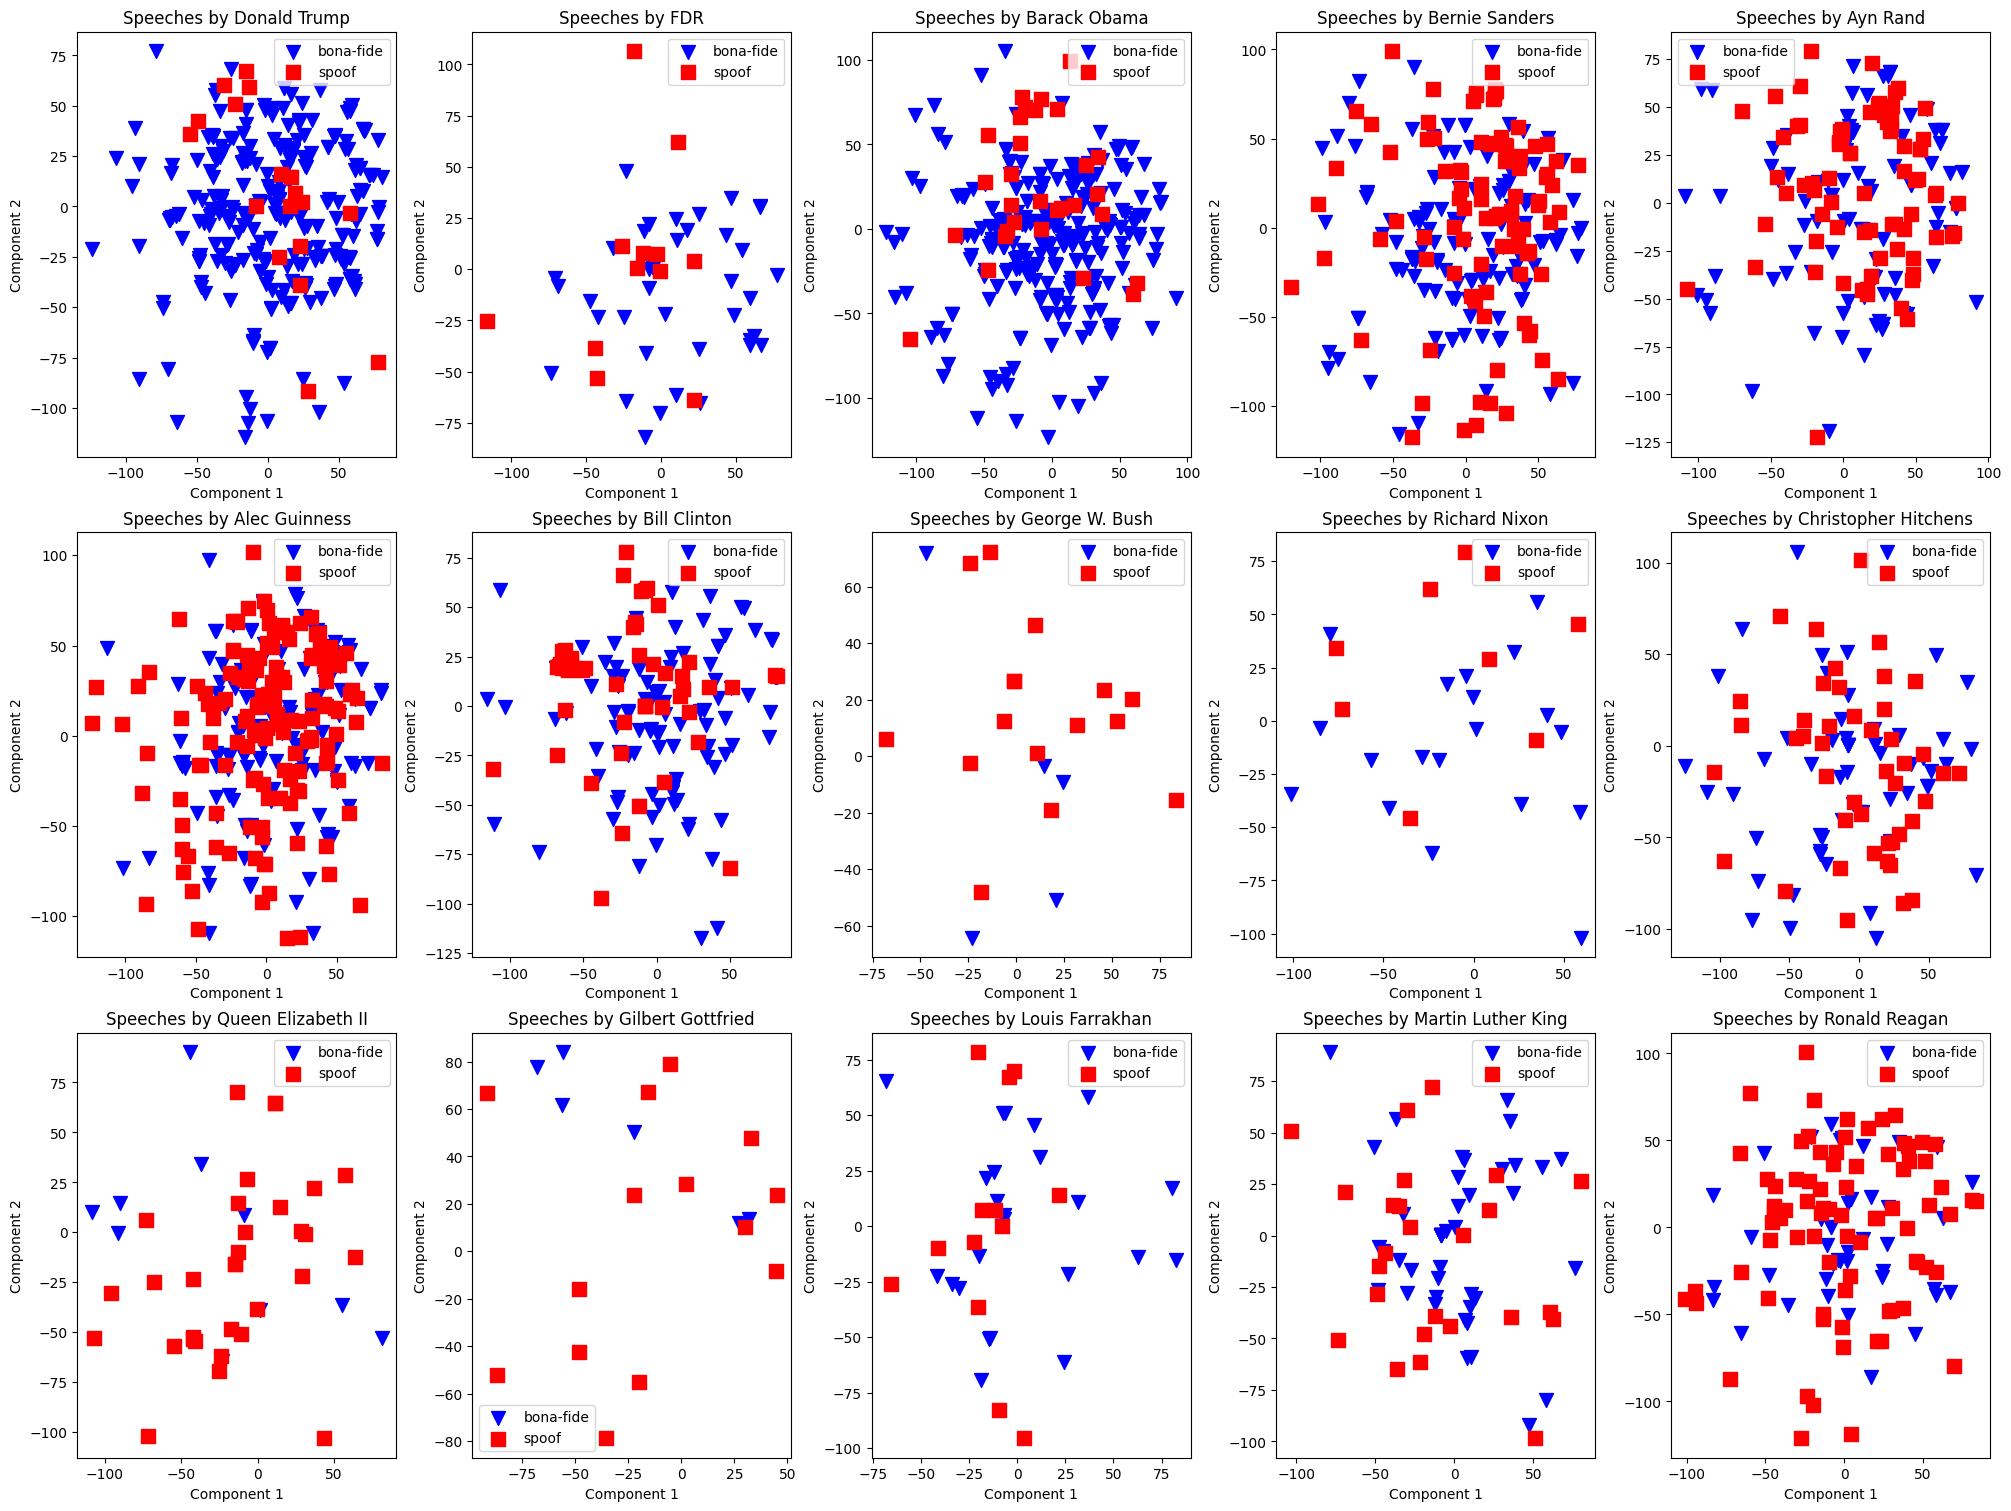

In [37]:
plot_speeches(X_tsne, df)